# Load the data

In [95]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import tarfile as tf
from pathlib import Path
import urllib.request as net
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit as SSS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def load_dataset():
    required_file = Path("datasets/housing.tgz")
    if required_file.is_file() == False:
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        net.urlretrieve(url, required_file)
        with tf.open(required_file) as housing_dataset:
            housing_dataset.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# Glance at the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
INFO: 
None
DESCRIBE: 
          longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std   

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

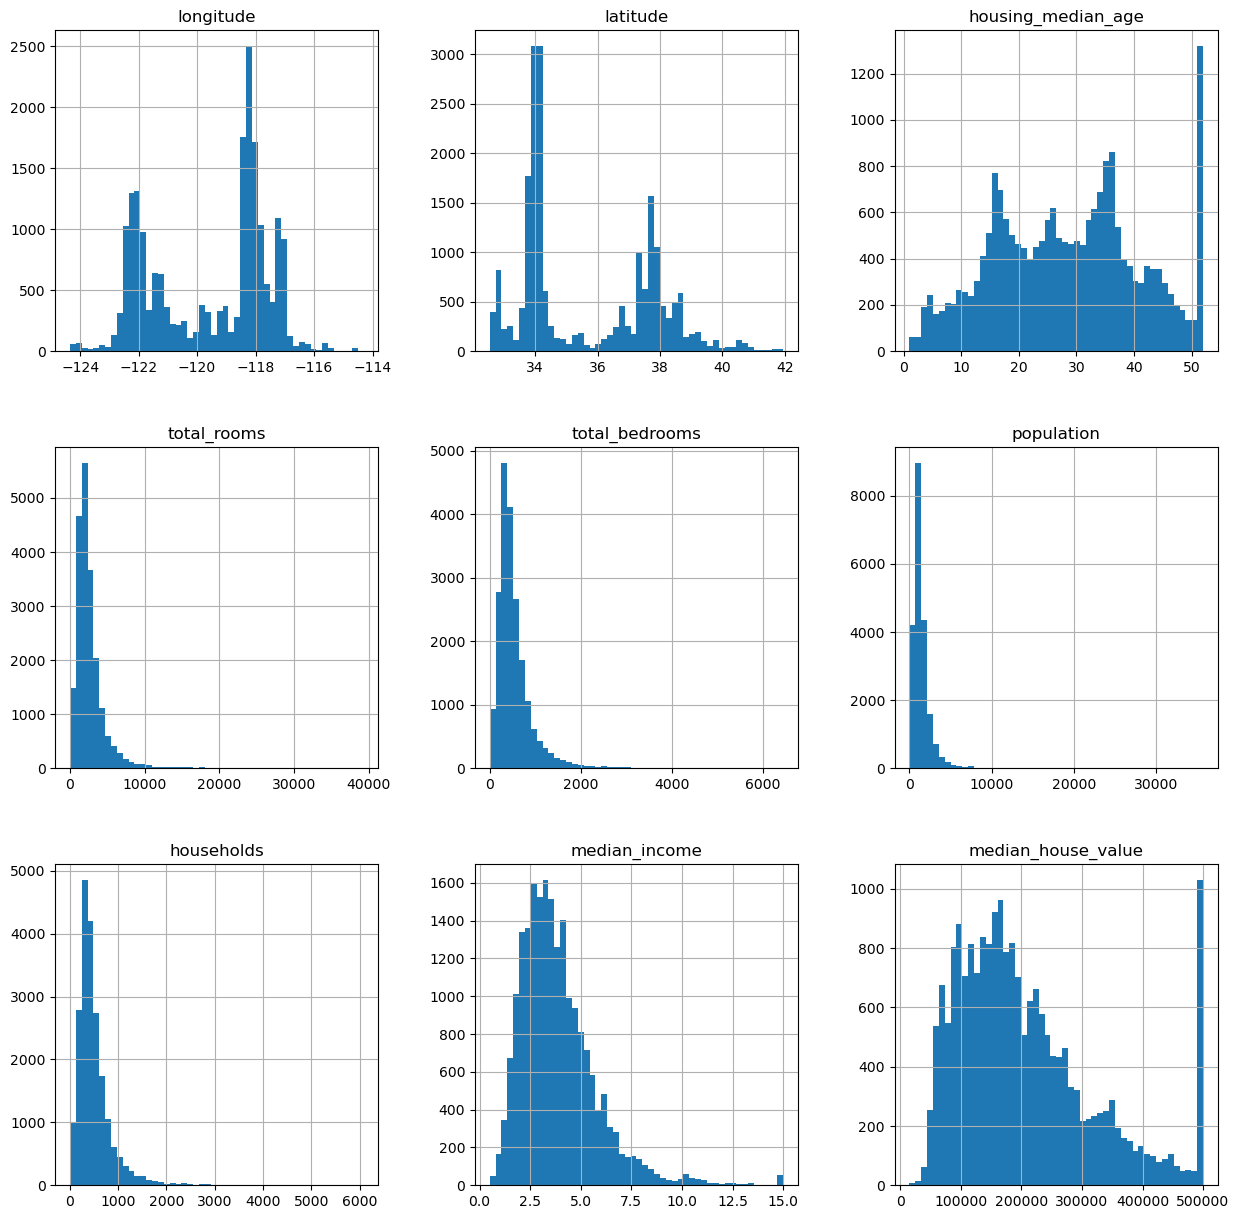

In [96]:
housing_dataset = load_dataset()
print(f"INFO: \n{housing_dataset.info()}")
print(f"DESCRIBE: \n{housing_dataset.describe()}")
housing_dataset.hist(bins = 50, figsize=(15, 15)),
plt.savefig("overview.png")
housing_dataset.head()

# Create a test set

It is important to set aside ~20% of our data for test set.

In [97]:
print(housing_dataset.head())
housing_dataset["incomeCatagoty"] = pd.cut(housing_dataset["median_income"], bins= (0, 1.5, 3, 4.5, 6, np.inf), labels= ("rank 1", "rank 2", "rank 3", "rank 4", "rank 5"))
 # We are adding a category attribute based on median income. Since, mostly based on median income we will predict house price.
housing_dataset.head()


   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]


longitude  latitude  ...  ocean_proximity  incomeCatagoty
0    -122.23     37.88  ...         NEAR BAY          rank 5
1    -122.22     37.86  ...         NEAR BAY          rank 5
2    -122.24     37.85  ...         NEAR BAY          rank 5
3    -122.25     37.85  ...         NEAR BAY          rank 4
4    -122.25     37.85  ...         NEAR BAY          rank 3

[5 rows x 11 columns]

Text(0.5, 1.0, 'MedianIncome')

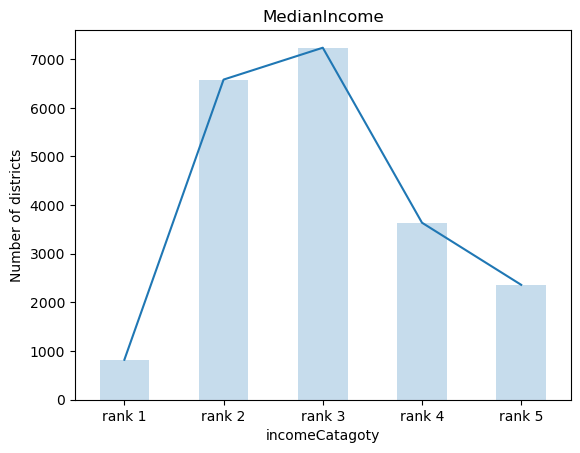

In [98]:
housing_dataset["incomeCatagoty"].value_counts().sort_index().plot.bar(rot=0, grid = True, alpha = 0.25)
housing_dataset["incomeCatagoty"].value_counts().sort_index().plot()
plt.ylabel("Number of districts")
plt.title("MedianIncome")

In [99]:
Spliter = SSS(n_splits=10, test_size= 0.2, random_state= 67)

train_test_pair_of_housing_datasets = []

for train, test in Spliter.split(housing_dataset, housing_dataset["incomeCatagoty"]):
    train_set = housing_dataset.iloc[train]
    test_set = housing_dataset.iloc[test]
    train_test_pair_of_housing_datasets.append([train_set, test_set])
train_test_pair_of_housing_datasets[0][0].head()

longitude  latitude  ...  ocean_proximity  incomeCatagoty
3998     -119.23     34.46  ...        <1H OCEAN          rank 3
13106    -119.76     36.73  ...           INLAND          rank 1
6471     -122.18     37.73  ...         NEAR BAY          rank 2
7877     -121.78     37.97  ...           INLAND          rank 4
6852     -121.14     37.48  ...           INLAND          rank 3

[5 rows x 11 columns]

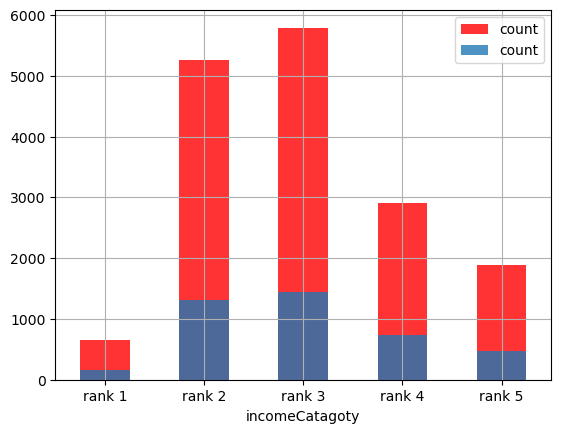

In [100]:
train_test_pair_of_housing_datasets[0][0]["incomeCatagoty"].value_counts().sort_index().plot.bar(rot = 0, grid = True, alpha = 0.8, color = "red", legend = "TrainSet") #Train set
train_test_pair_of_housing_datasets[0][1]["incomeCatagoty"].value_counts().sort_index().plot.bar(rot = 0, grid = True, alpha = 0.8, legend = "TestSet") #Test set
# Ratio is almost identical
plt.legend(loc="best")

In [101]:
print(train_test_pair_of_housing_datasets[0][0].head())
#lets get rid of inconeCategory attribute
for dfPair in train_test_pair_of_housing_datasets:
    for df in dfPair:
        df.drop("incomeCatagoty", axis = 1, inplace = True)
train_test_pair_of_housing_datasets[0][0].head()

       longitude  latitude  ...  ocean_proximity  incomeCatagoty
3998     -119.23     34.46  ...        <1H OCEAN          rank 3
13106    -119.76     36.73  ...           INLAND          rank 1
6471     -122.18     37.73  ...         NEAR BAY          rank 2
7877     -121.78     37.97  ...           INLAND          rank 4
6852     -121.14     37.48  ...           INLAND          rank 3

[5 rows x 11 columns]


C:\Users\momin\AppData\Local\Temp\ipykernel_9912\3656660086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("incomeCatagoty", axis = 1, inplace = True)
C:\Users\momin\AppData\Local\Temp\ipykernel_9912\3656660086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("incomeCatagoty", axis = 1, inplace = True)
C:\Users\momin\AppData\Local\Temp\ipykernel_9912\3656660086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

longitude  latitude  ...  median_house_value  ocean_proximity
3998     -119.23     34.46  ...            227600.0        <1H OCEAN
13106    -119.76     36.73  ...             45500.0           INLAND
6471     -122.18     37.73  ...             79700.0         NEAR BAY
7877     -121.78     37.97  ...            213700.0           INLAND
6852     -121.14     37.48  ...            128100.0           INLAND

[5 rows x 10 columns]

In [102]:
firstPairDF = train_test_pair_of_housing_datasets[0]
firstTrainDF = firstPairDF[0]
firstTestDF = firstPairDF[1]
print(firstTestDF.info())
firstTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 3054 to 12311
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4089 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 3998 to 13271
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  f

# Explore & Visualize the Dataframe

In [103]:
fTVDF = firstTrainDF.copy() # Making a copy to keep orginal data as it is.

Text(0.5, 1.0, 'Data density per coordinates:')

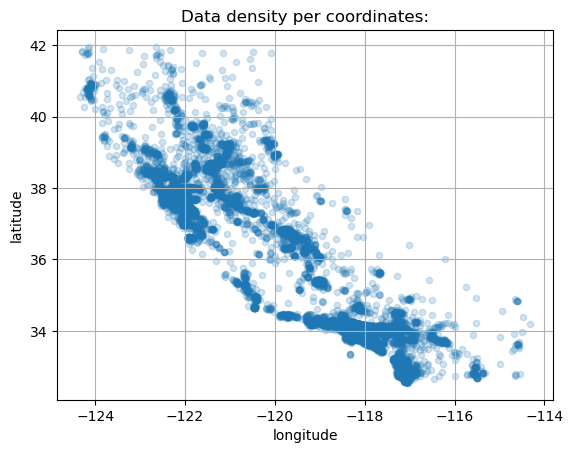

In [104]:
fTVDF.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.2, grid = True)
plt.title("Data density per coordinates:")

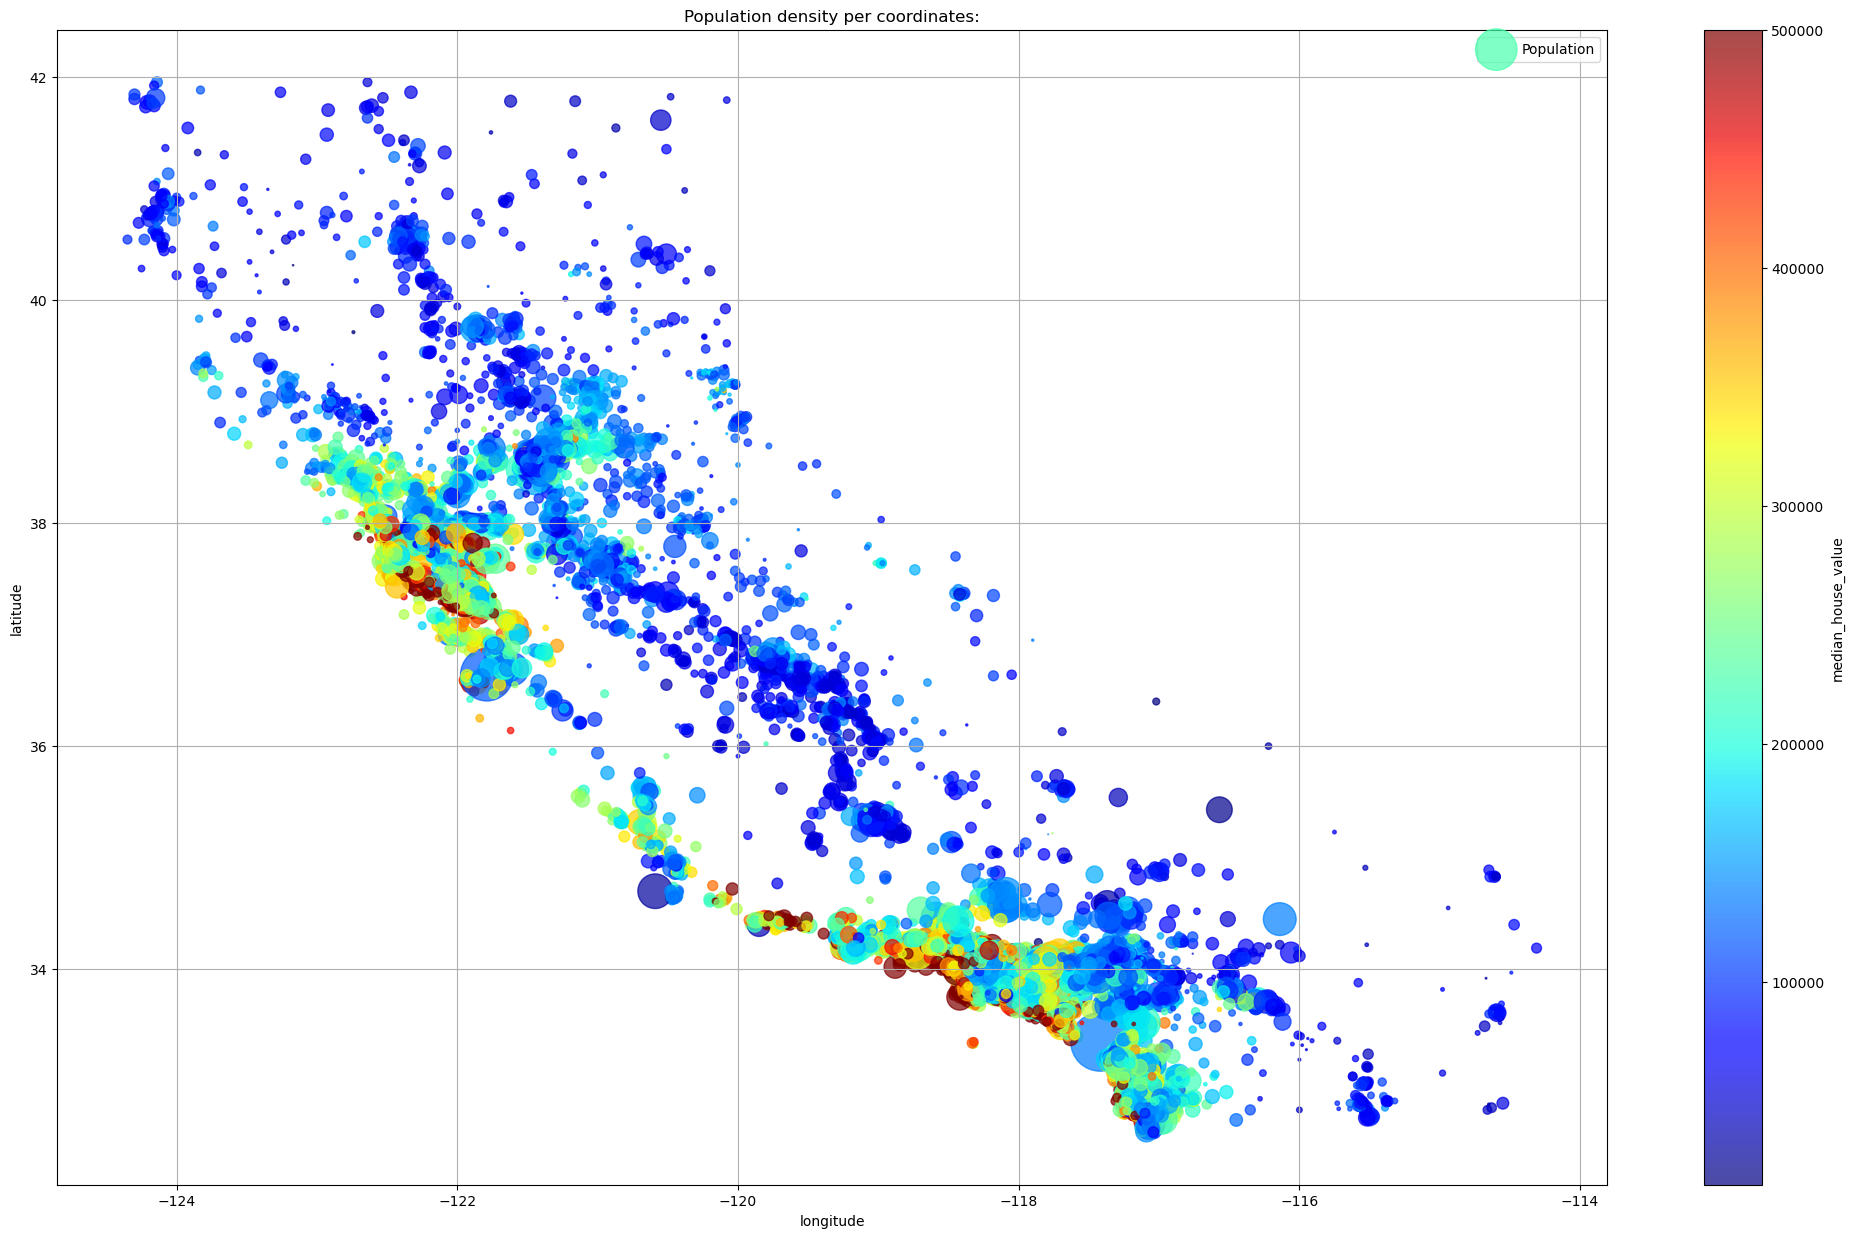

In [105]:
fTVDF.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.7, grid = True, c = "median_house_value", s = fTVDF["population"]/20, cmap = "jet", colorbar = True, label = "Population",figsize=(25,15))
plt.title("Population density per coordinates:")
plt.savefig("Population density per coordinates.png")

# Look for Correlations

In [106]:
correlation_matrix = fTVDF.select_dtypes(include="number").corr()
correlation_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691139
total_rooms           0.132528
housing_median_age    0.108659
households            0.064533
total_bedrooms        0.047298
population           -0.023768
longitude            -0.043745
latitude             -0.147377
Name: median_house_value, dtype: float64

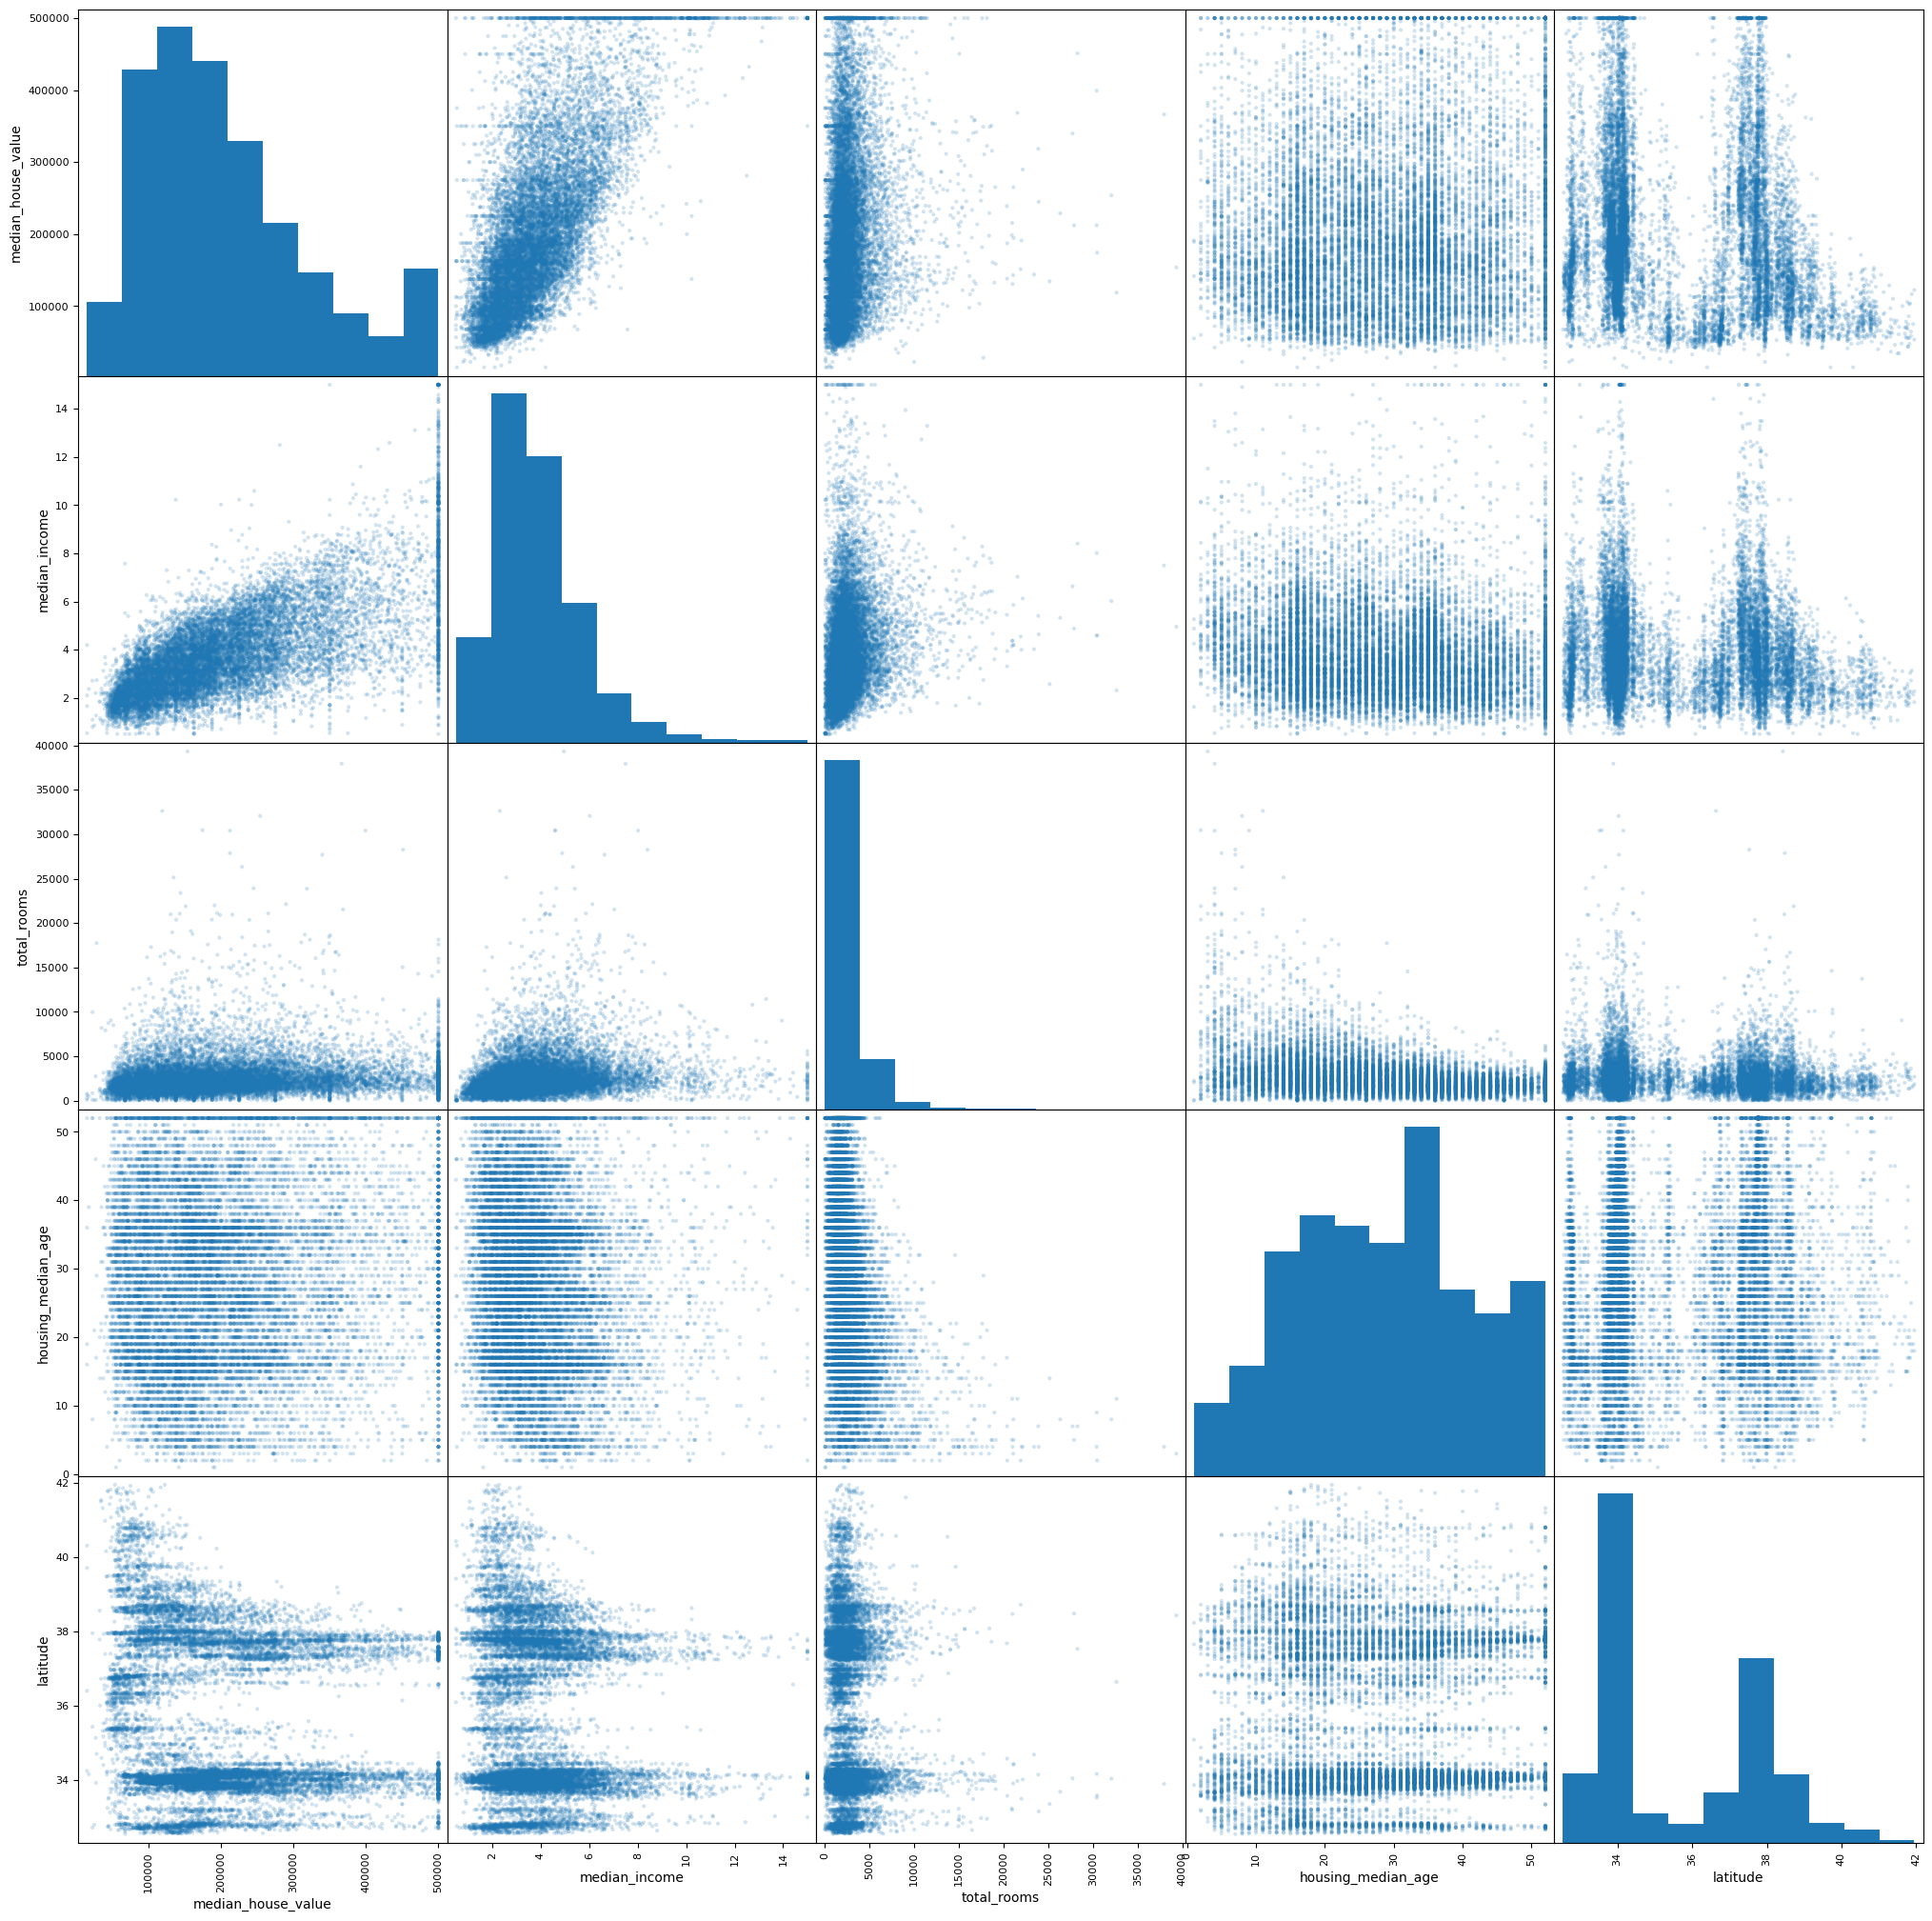

In [107]:
corelatedAttributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
scatter_matrix(fTVDF[corelatedAttributes], figsize= (25, 25), alpha = 0.2)
plt.savefig("corelatedAttributes.png")

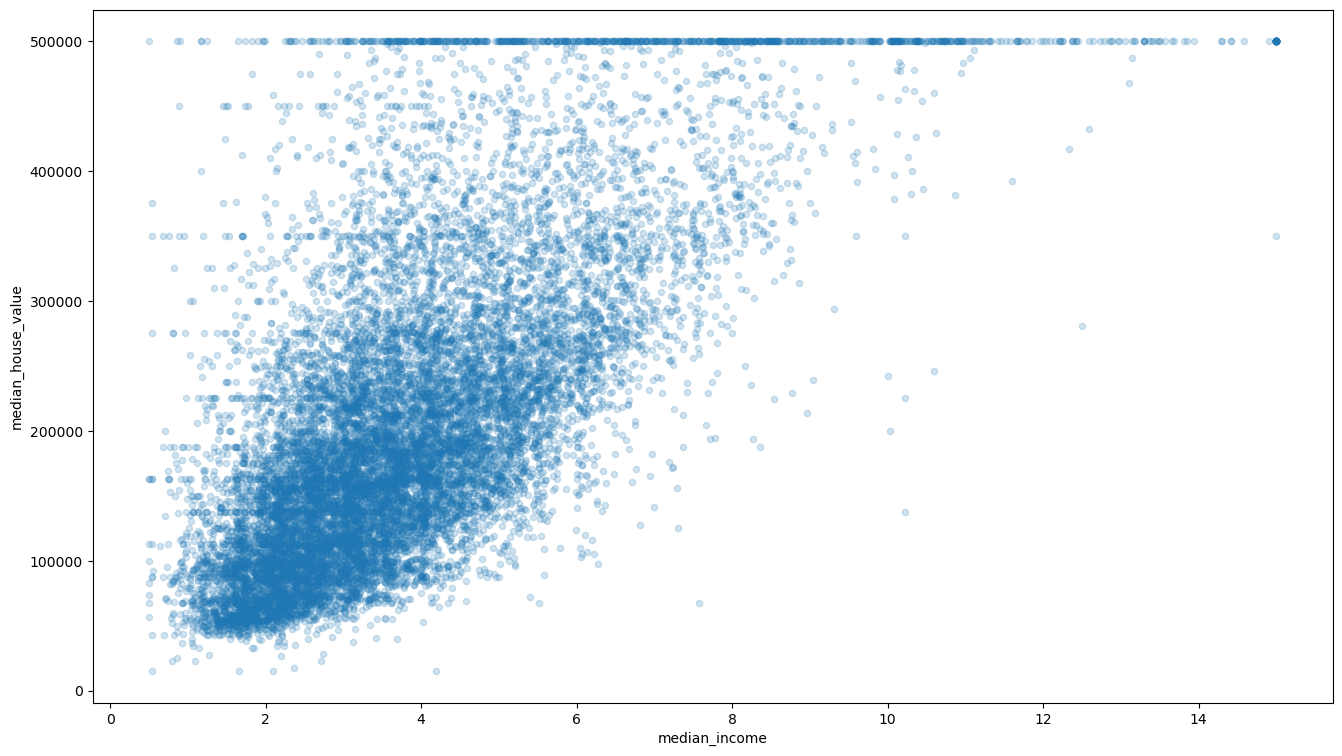

In [108]:
fTVDF.plot(kind= "scatter", y = "median_house_value", x = "median_income", figsize=(16,9), alpha = 0.2)
plt.savefig("the_highest_corelation.png")

# Experiment with attribute combinations

In [109]:
fTVDF["incomePerPopulation"] = fTVDF["median_income"] / fTVDF["population"]
fTVDF["rooms_per_house"] = fTVDF["total_rooms"] / fTVDF["households"]
fTVDF["bedrooms_ratio"] = fTVDF["total_bedrooms"] / fTVDF["total_rooms"]
fTVDF["people_per_house"] = fTVDF["population"] / fTVDF["households"]
fTVDF.head()

longitude  latitude  ...  bedrooms_ratio  people_per_house
3998     -119.23     34.46  ...        0.190194          2.666273
13106    -119.76     36.73  ...        0.233741          4.249267
6471     -122.18     37.73  ...        0.217153          3.198529
7877     -121.78     37.97  ...        0.149483          3.244171
6852     -121.14     37.48  ...        0.187359          3.054381

[5 rows x 14 columns]

In [110]:
with_combine_correlation = fTVDF.select_dtypes(include="number").corr()
with_combine_correlation["median_house_value"].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.691139
rooms_per_house        0.153158
total_rooms            0.132528
incomePerPopulation    0.124284
housing_median_age     0.108659
households             0.064533
total_bedrooms         0.047298
people_per_house      -0.021832
population            -0.023768
longitude             -0.043745
latitude              -0.147377
bedrooms_ratio        -0.257866
Name: median_house_value, dtype: float64

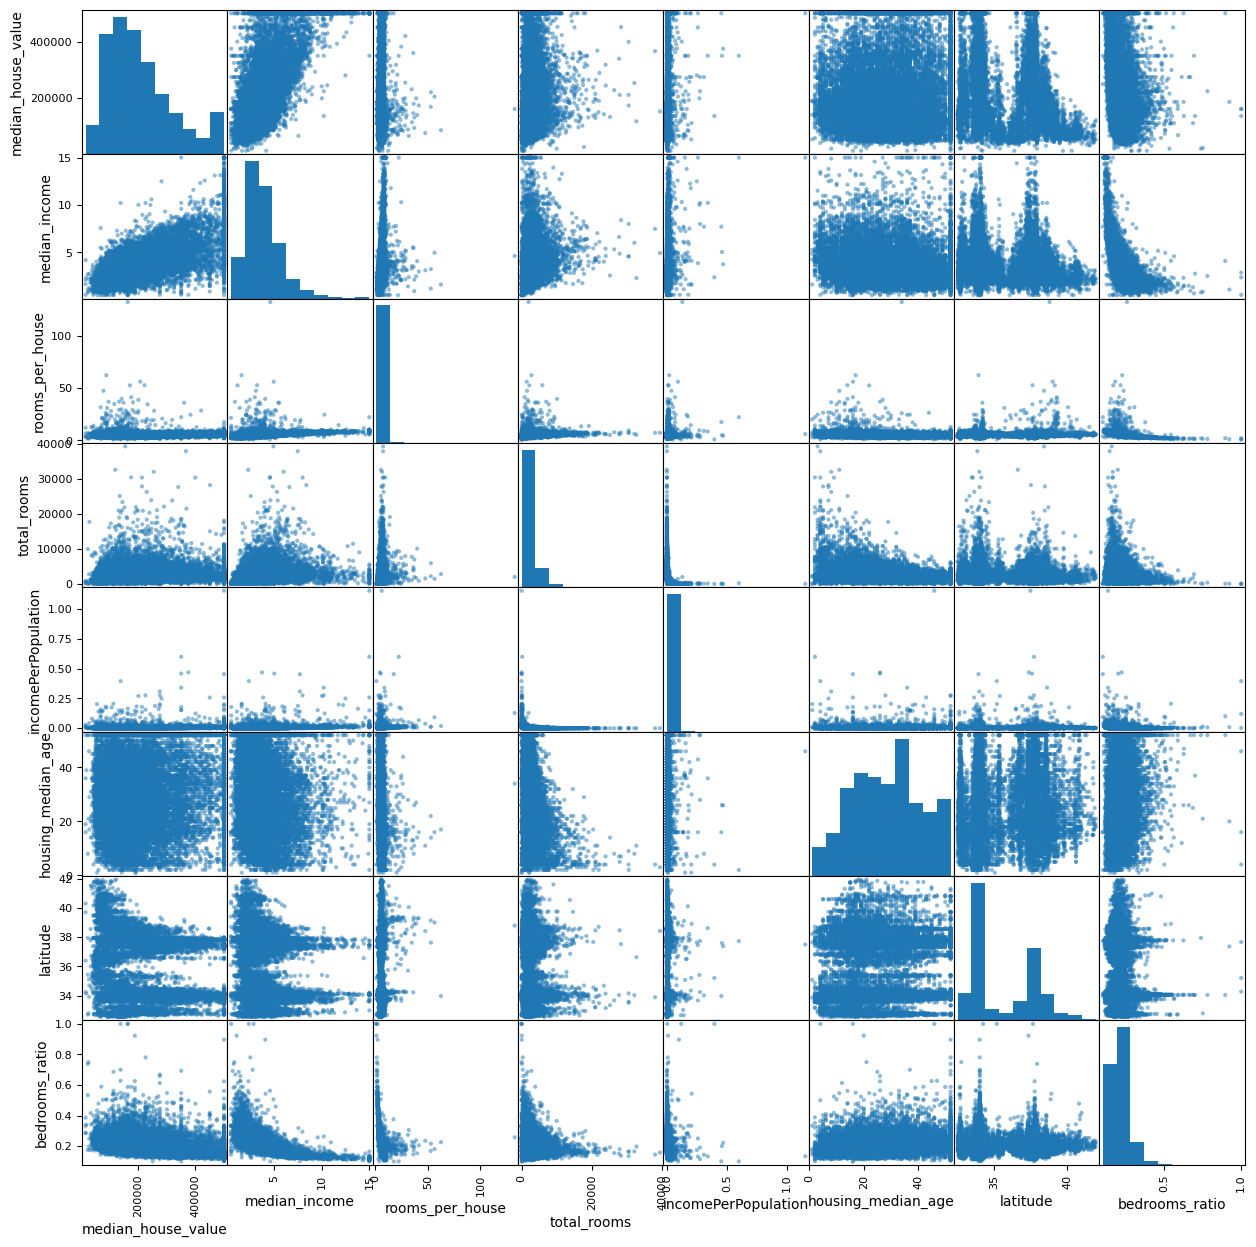

In [111]:
scatter_matrix(fTVDF[["median_house_value", "median_income", "rooms_per_house", "total_rooms", "incomePerPopulation", "housing_median_age", "latitude", "bedrooms_ratio"]], figsize=(15, 15))
plt.show()

# Prepare data

In [112]:
housing_input = fTVDF.drop("median_house_value", axis= 1)
housing_label = fTVDF["median_house_value"].copy()
housing_input_num = housing_input.select_dtypes(include = "number")
housing_input_num

longitude  latitude  ...  bedrooms_ratio  people_per_house
3998     -119.23     34.46  ...        0.190194          2.666273
13106    -119.76     36.73  ...        0.233741          4.249267
6471     -122.18     37.73  ...        0.217153          3.198529
7877     -121.78     37.97  ...        0.149483          3.244171
6852     -121.14     37.48  ...        0.187359          3.054381
...          ...       ...  ...             ...               ...
10544    -121.96     37.06  ...        0.169569          3.155340
6267     -122.49     37.74  ...        0.186821          2.645161
9670     -117.99     33.89  ...        0.144955          3.399306
13227    -118.01     33.88  ...        0.272664          3.190616
13271    -117.10     32.71  ...        0.263046          4.179167

[16512 rows x 12 columns]

# Clean the data (Replace null values)

In [113]:
nulIndex = housing_input_num.isnull().any(axis=1)
housing_input_num[nulIndex]

longitude  latitude  ...  bedrooms_ratio  people_per_house
14903    -116.95     32.84  ...             NaN          3.255411
14935    -122.48     37.70  ...             NaN          2.262199
12647    -117.97     34.06  ...             NaN          4.414487
8859     -122.44     37.80  ...             NaN          1.360332
14938    -124.00     40.92  ...             NaN          2.526316
...          ...       ...  ...             ...               ...
12419    -119.38     36.53  ...             NaN          4.856655
19605    -122.14     37.67  ...             NaN          2.935368
15903    -122.39     37.60  ...             NaN          2.442308
13661    -120.61     37.36  ...             NaN          2.878788
2111     -118.10     33.74  ...             NaN          1.824219

[168 rows x 12 columns]

In [114]:
nulIndex

3998     False
13106    False
6471     False
7877     False
6852     False
         ...  
10544    False
6267     False
9670     False
13227    False
13271    False
Length: 16512, dtype: bool

In [115]:
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_input_num)
t = imputer.transform(housing_input_num)


In [116]:
housing_input_num = pd.DataFrame(t, columns= housing_input_num.columns, index= housing_input_num.index)
housing_input_num.loc[nulIndex]

longitude  latitude  ...  bedrooms_ratio  people_per_house
14903    -116.95     32.84  ...        0.203153          3.255411
14935    -122.48     37.70  ...        0.203153          2.262199
12647    -117.97     34.06  ...        0.203153          4.414487
8859     -122.44     37.80  ...        0.203153          1.360332
14938    -124.00     40.92  ...        0.203153          2.526316
...          ...       ...  ...             ...               ...
12419    -119.38     36.53  ...        0.203153          4.856655
19605    -122.14     37.67  ...        0.203153          2.935368
15903    -122.39     37.60  ...        0.203153          2.442308
13661    -120.61     37.36  ...        0.203153          2.878788
2111     -118.10     33.74  ...        0.203153          1.824219

[168 rows x 12 columns]

# Process Text data

In [117]:
housing_input_ocean_proximity_category = housing_input[["ocean_proximity"]]
housing_input_ocean_proximity_category

ocean_proximity
3998        <1H OCEAN
13106          INLAND
6471         NEAR BAY
7877           INLAND
6852           INLAND
...               ...
10544      NEAR OCEAN
6267       NEAR OCEAN
9670        <1H OCEAN
13227       <1H OCEAN
13271      NEAR OCEAN

[16512 rows x 1 columns]

In [118]:
category_encoder = OneHotEncoder(handle_unknown="ignore")
onehot_housing_input_ocean_proximity_category = category_encoder.fit_transform(housing_input_ocean_proximity_category)

In [119]:
df_housing_cat_out = pd.DataFrame(onehot_housing_input_ocean_proximity_category.toarray(), columns= category_encoder.get_feature_names_out(), index = housing_input_ocean_proximity_category.index)

In [120]:
df_housing_cat_out

ocean_proximity_<1H OCEAN  ...  ocean_proximity_NEAR OCEAN
3998                         1.0  ...                         0.0
13106                        0.0  ...                         0.0
6471                         0.0  ...                         0.0
7877                         0.0  ...                         0.0
6852                         0.0  ...                         0.0
...                          ...  ...                         ...
10544                        0.0  ...                         1.0
6267                         0.0  ...                         1.0
9670                         1.0  ...                         0.0
13227                        1.0  ...                         0.0
13271                        0.0  ...                         1.0

[16512 rows x 5 columns]

In [121]:
dataMap = {"ocean_proximity":["x", "NEAR BAY", "z"]}
dataMapDF = pd.DataFrame(dataMap)
dataMapDF

ocean_proximity
0               x
1        NEAR BAY
2               z

In [122]:
dataMapCatDF = pd.DataFrame(category_encoder.transform(dataMapDF).toarray(), columns= category_encoder.get_feature_names_out(), index= dataMapDF.index)
dataMapCatDF # All ynknown (x & z) rows will have all 0

ocean_proximity_<1H OCEAN  ...  ocean_proximity_NEAR OCEAN
0                        0.0  ...                         0.0
1                        0.0  ...                         0.0
2                        0.0  ...                         0.0

[3 rows x 5 columns]

In [123]:
df_housing_cat_out

ocean_proximity_<1H OCEAN  ...  ocean_proximity_NEAR OCEAN
3998                         1.0  ...                         0.0
13106                        0.0  ...                         0.0
6471                         0.0  ...                         0.0
7877                         0.0  ...                         0.0
6852                         0.0  ...                         0.0
...                          ...  ...                         ...
10544                        0.0  ...                         1.0
6267                         0.0  ...                         1.0
9670                         1.0  ...                         0.0
13227                        1.0  ...                         0.0
13271                        0.0  ...                         1.0

[16512 rows x 5 columns]

# Feature Scaling and Transformation

Imports:

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

someInput = housing_input[["median_income"]].iloc[67:76]

In [125]:
# Method one (label scaling) | Method one and two produce the same output/predictions.
standardScaler = StandardScaler()
model = LinearRegression()
label_standard_scaled = standardScaler.fit_transform(housing_label.to_frame())
model.fit(housing_input[["median_income"]], label_standard_scaled)
prediction_standard_scaled = model.predict(someInput)
prediction = standardScaler.inverse_transform(prediction_standard_scaled)
prediction



array([[151317.27706524],
       [258953.10950293],
       [129785.90769474],
       [161421.00768531],
       [181506.58531982],
       [314994.35080414],
       [183149.91255462],
       [239863.61512839],
       [135472.40833075]])

In [126]:
# Method two (label scaling) | Method one and two produce the same output/predictions.
model = TransformedTargetRegressor(LinearRegression(), transformer= StandardScaler())
model.fit(housing_input[["median_income"]], housing_label.to_frame())
model.predict(someInput)

array([[151317.27706524],
       [258953.10950293],
       [129785.90769474],
       [161421.00768531],
       [181506.58531982],
       [314994.35080414],
       [183149.91255462],
       [239863.61512839],
       [135472.40833075]])

In [127]:
housing_label[67:76]

18315    191000.0
13075    266700.0
15523     99600.0
18300    149300.0
19983    184200.0
6532     289200.0
14611    189000.0
1768     276300.0
1389      77200.0
Name: median_house_value, dtype: float64

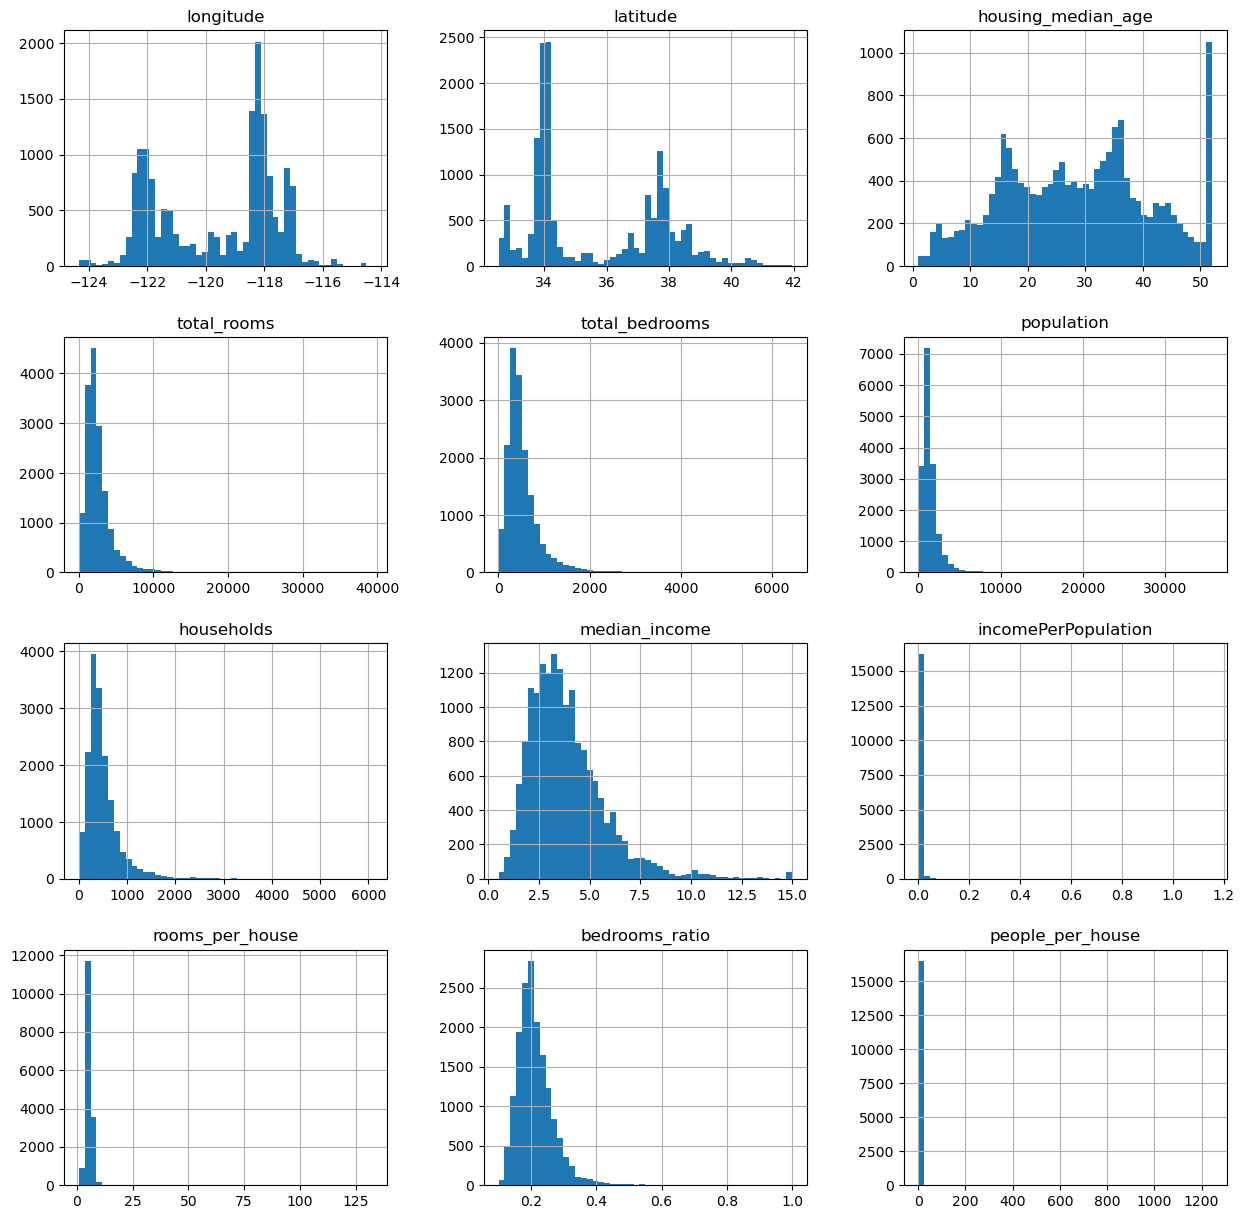

In [128]:
housing_input_num.hist(bins = 50, figsize=(15, 15))
plt.show()

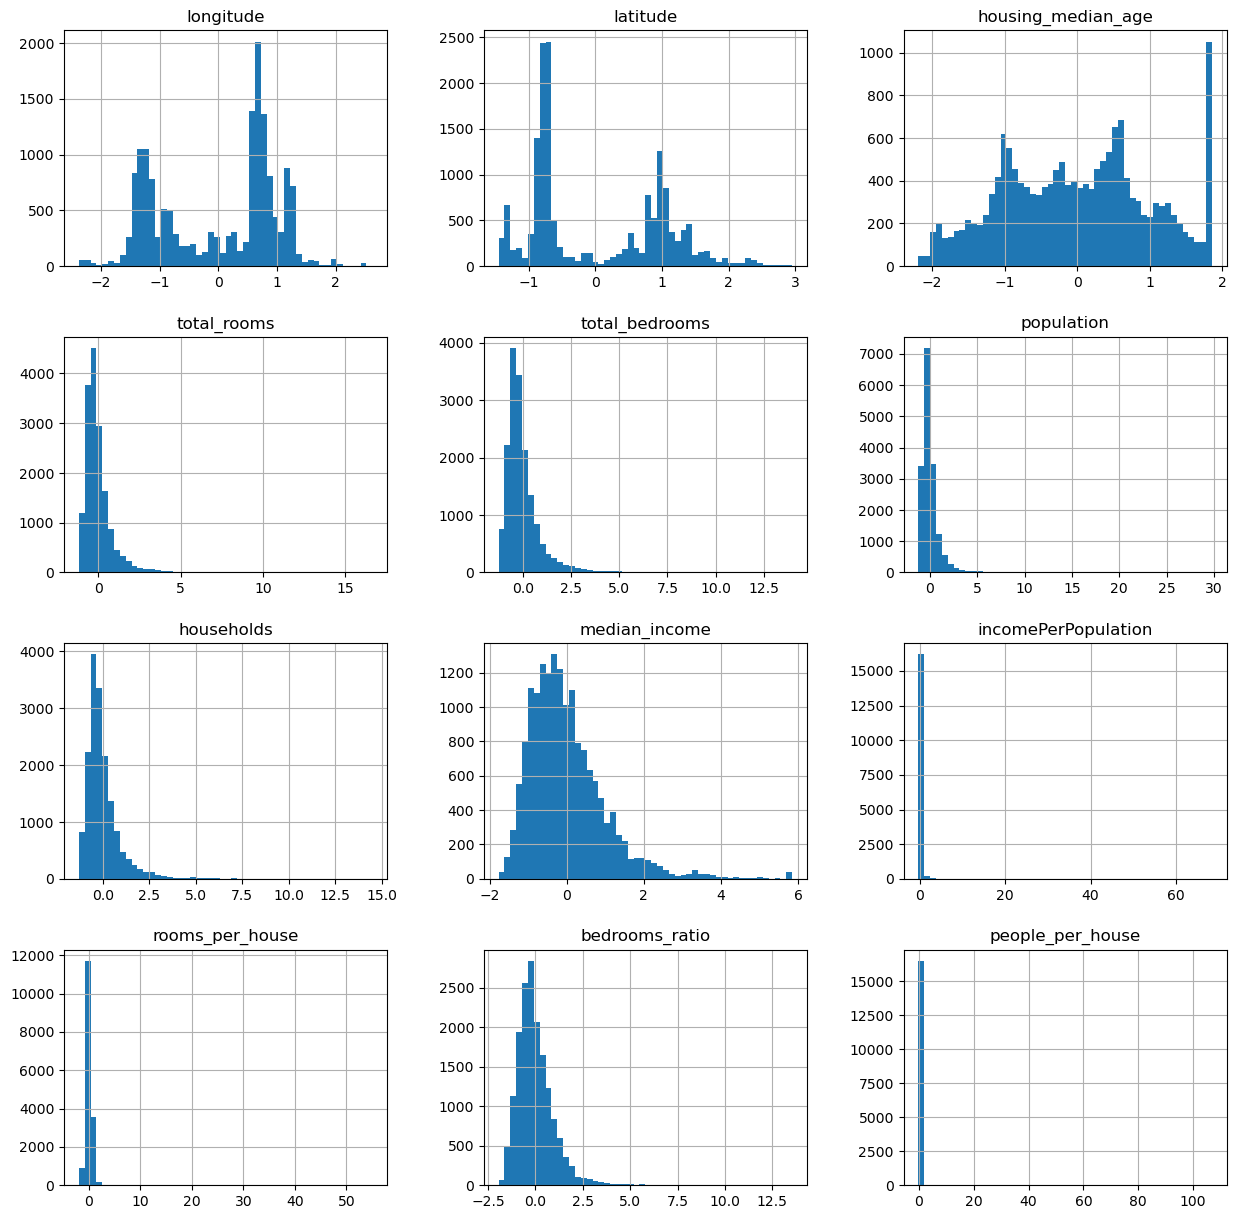

In [129]:
# Input scaling
housing_input_num_standartd_scaled = standardScaler.fit_transform(housing_input_num)
housing_input_num_standartd_scaled_df = pd.DataFrame(housing_input_num_standartd_scaled, columns=housing_input_num.columns, index= housing_input_num.index)
housing_input_num_standartd_scaled_df.hist(bins = 50, figsize=(15,15))
plt.show()

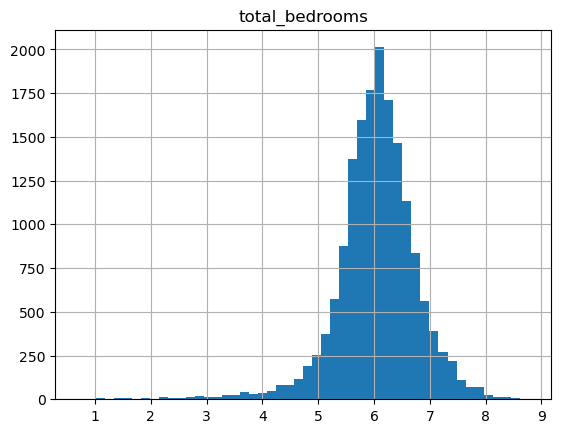

In [130]:
# If a feature has a really long and heavy tail, such as power law distribution. Then replacing the feature with it's logarithm may help.
housing_input_bedrooms_log = housing_input_num["total_bedrooms"].apply(np.log).to_frame()
housing_input_bedrooms_log.hist(bins=50) # Roughly looks like a normal distribution
plt.show()

# Custom Transformer

Imports:

In [131]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

If we do not need any training or .fit() then we can make a custom transformer with FunctionTransformer():

In [132]:
logTransformer = FunctionTransformer(np.log, inverse_func=np.exp)
housing_input_population_log = logTransformer.transform(housing_input[["population"]])

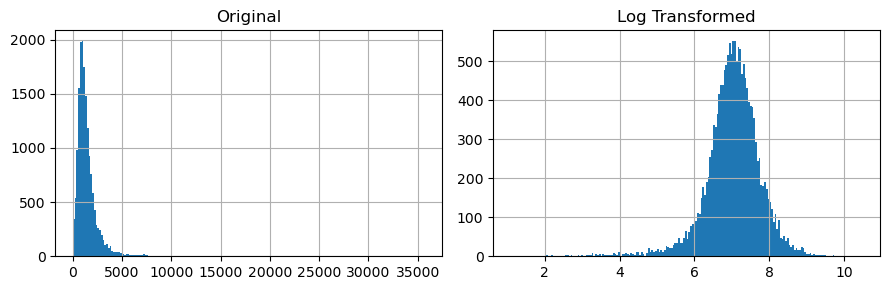

In [133]:
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.hist(logTransformer.inverse_transform(housing_input_population_log), bins=200)
plt.grid(True)
plt.title("Original")

plt.subplot(122)
plt.hist(housing_input_population_log, bins=200)
plt.grid(True)
plt.title("Log Transformed")

plt.tight_layout()
plt.show()


If we need .fit() to train, then we can make a transformer through a class

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [135]:
clusterSimilarity = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
similarity = clusterSimilarity.fit_transform(housing_input[["longitude",	"latitude"]])
similarity.round(3)

array([[0.   , 0.058, 0.   , ..., 0.   , 0.   , 0.699],
       [0.007, 0.   , 0.001, ..., 0.   , 0.071, 0.032],
       [0.746, 0.   , 0.101, ..., 0.   , 0.242, 0.   ],
       ...,
       [0.   , 0.881, 0.   , ..., 0.133, 0.   , 0.023],
       [0.   , 0.867, 0.   , ..., 0.129, 0.   , 0.025],
       [0.   , 0.177, 0.   , ..., 0.909, 0.   , 0.   ]], shape=(16512, 10))